In [ ]:
##K NEAREST NEIGHBORS##

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Handwritten-Digit-Recognition-using-Deep-Learning-main (1)/Handwritten-Digit-Recognition-using-Deep-Learning-main/1. K Nearest Neighbors/MNIST_Dataset_Loader')  # Adjust the path as needed
from mnist_loader import MNIST

# Use the custom MNIST class to load data
print('\nLoading MNIST Data...')
data = MNIST('/content/drive/MyDrive/Handwritten-Digit-Recognition-using-Deep-Learning-main (1)/Handwritten-Digit-Recognition-using-Deep-Learning-main/1. K Nearest Neighbors/MNIST_Dataset_Loader/dataset')  # Adjust the path as needed


Loading MNIST Data...


In [ ]:
print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)




Loading Training Data...

Loading Testing Data...


In [ ]:
X = train_img
y = train_labels

In [ ]:
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)

print('\nKNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10')
clf = KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=10)
clf.fit(X_train, y_train)


Preparing Classifier Training and Validation Data...

KNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10


KNeighborsClassifier(n_jobs=10)

In [ ]:
print('\nPickling the Classifier for Future Use...')
with open('MNIST_KNN.pickle', 'wb') as f:
    pickle.dump(clf, f)

pickle_in = open('MNIST_KNN.pickle', 'rb')
clf = pickle.load(pickle_in)

print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(X_test, y_test)
print('\nKNN Trained Classifier Confidence: ', confidence)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ', accuracy)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix: \n', conf_mat)



Pickling the Classifier for Future Use...

Calculating Accuracy of trained Classifier...

KNN Trained Classifier Confidence:  0.9723333333333334

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Accuracy of Classifier on Validation Image Data:  0.9723333333333334

Creating Confusion Matrix...

Confusion Matrix: 
 [[618   0   1   0   0   0   1   0   0   0]
 [  1 665   1   0   1   0   0   2   0   1]
 [  4   2 525   3   1   1   1   5   1   1]
 [  0   2   4 621   0   3   0   3   2   4]
 [  0   5   0   0 541   0   0   1   0   5]
 [  3   0   0   6   1 567   5   0   2   4]
 [  2   2   0   0   0   1 572   0   0   0]
 [  1   8   2   1   2   0   0 625   0   7]
 [  2   6   1   4   3  13   3   1 547  12]
 [  1   3   1   2   5   1   0   4   1 553]]


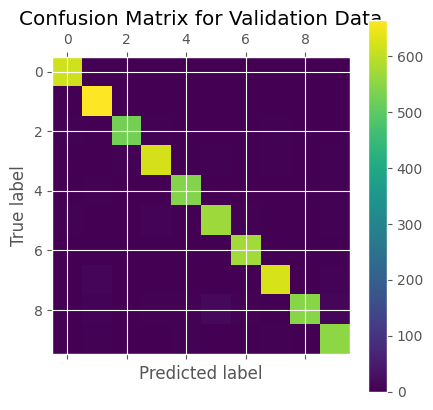

In [ ]:
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

print('\nCalculating Accuracy of Trained Classifier on Test Data...')
acc = accuracy_score(test_labels, test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ', acc)

print('\nCreating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels, test_labels_pred)
print('\nConfusion Matrix for Test Data: \n', conf_mat_test)


Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data...

Accuracy of Classifier on Test Images:  0.9684

Creating Confusion Matrix for Test Data...

Confusion Matrix for Test Data: 
 [[ 972    1    1    0    0    1    3    1    1    0]
 [   0 1132    2    0    0    0    1    0    0    0]
 [  11    5  993    1    1    0    1   16    4    0]
 [   0    3    2  975    1   12    1    8    4    4]
 [   2    7    0    0  943    0    5    2    1   22]
 [   6    0    0   11    2  862    5    2    1    3]
 [   5    2    0    0    3    2  946    0    0    0]
 [   0   23    4    0    3    0    0  988    0   10]
 [   9    2    7   12    6   13    5    6  910    4]
 [   4    7    2    9    7    3    1   11    2  963]]


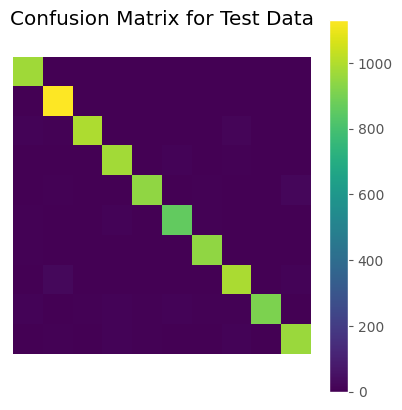

In [ ]:
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

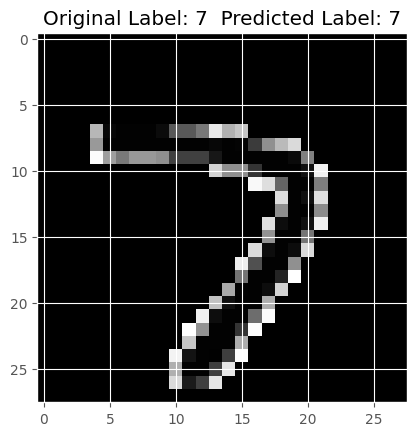

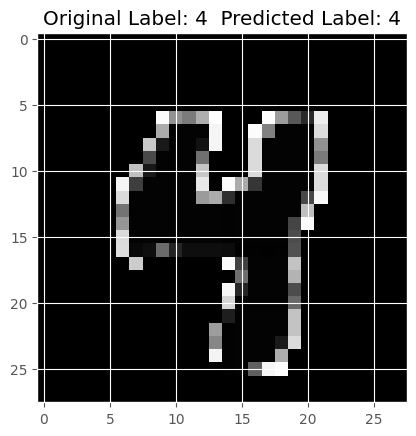

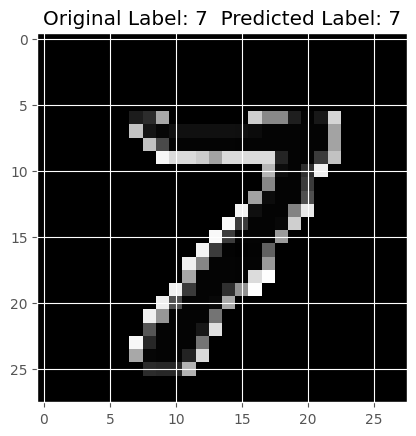

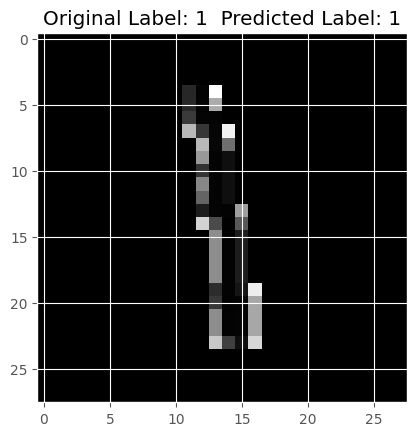

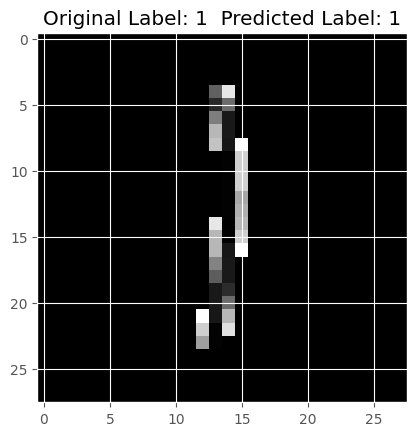

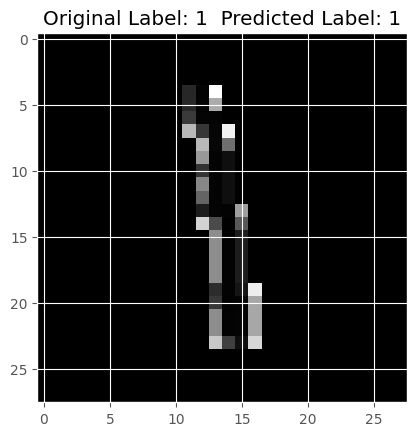

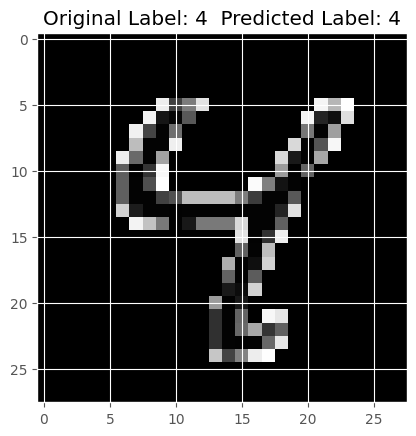

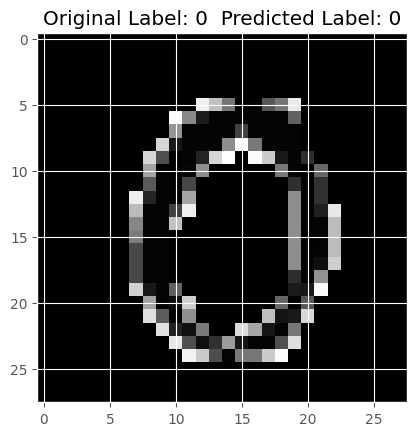

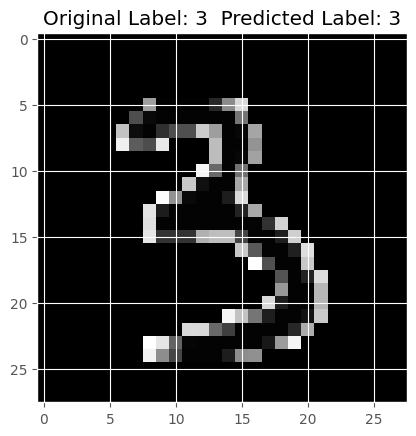

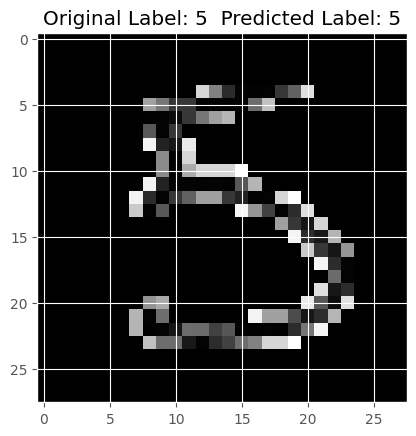

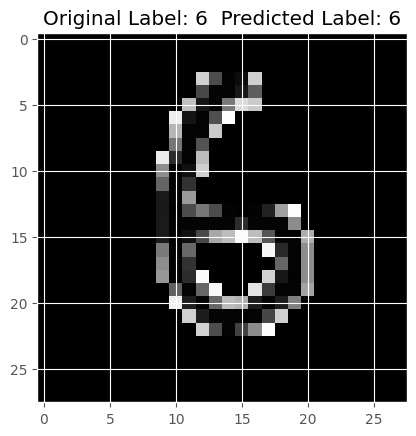

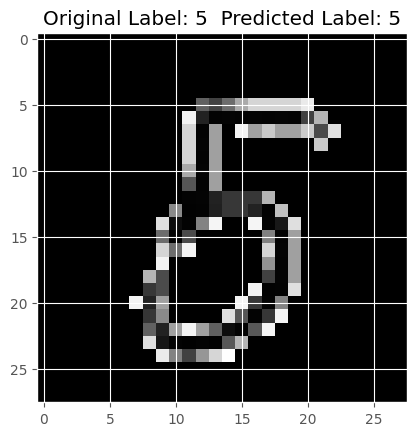

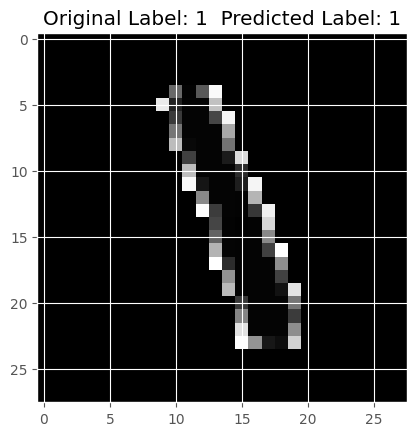

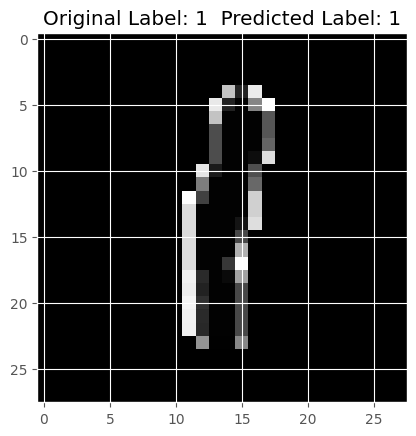

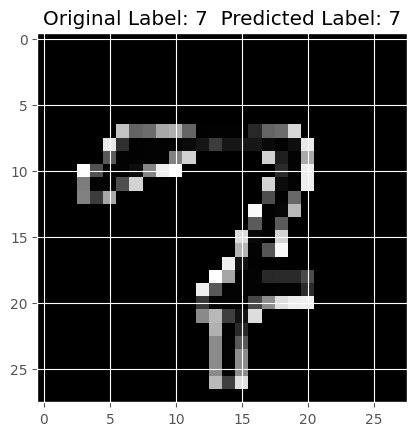

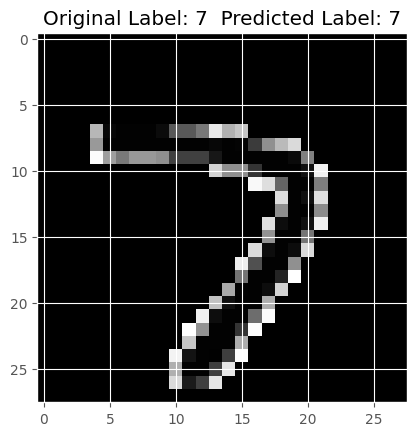

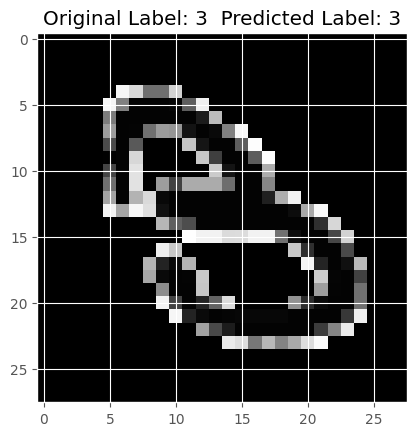

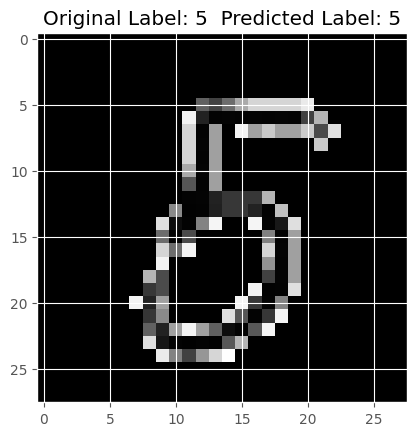

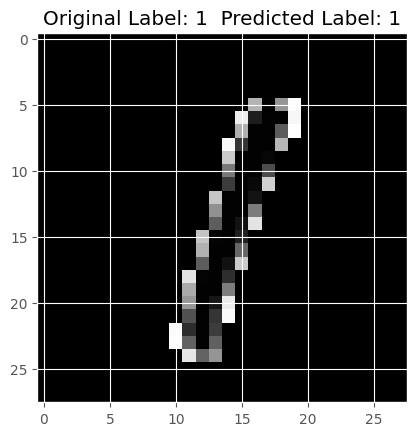

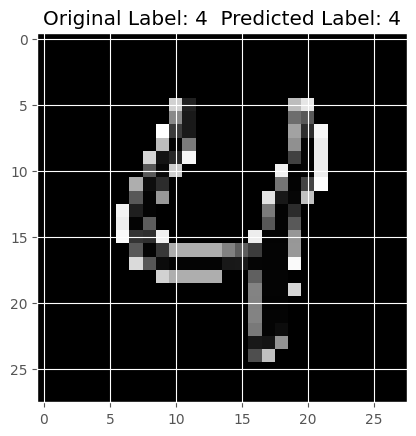

In [ ]:
a = np.random.randint(1, 50, 20)
for i in a:
    two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i], test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()

In [ ]:
##SVM##

In [ ]:
import sys
import numpy as np
import pickle
from sklearn import model_selection, svm, preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
from mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [ ]:
old_stdout = sys.stdout
log_file = open("summary.log","w")
sys.stdout = log_file

In [ ]:
print('\nLoading MNIST Data...')
data = MNIST('/content/drive/MyDrive/Handwritten-Digit-Recognition-using-Deep-Learning-main (1)/Handwritten-Digit-Recognition-using-Deep-Learning-main/2. SVM/MNIST_Dataset_Loader/dataset')

print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)


#Features
X = train_img

#Labels
y = train_labels

In [ ]:
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)


# Pickle the Classifier for Future Use
print('\nSVM Classifier with gamma = 0.1; Kernel = polynomial')
print('\nPickling the Classifier for Future Use...')
clf = svm.SVC(gamma=0.1, kernel='poly')
clf.fit(X_train,y_train)

with open('MNIST_SVM.pickle','wb') as f:
	pickle.dump(clf, f)

pickle_in = open('MNIST_SVM.pickle','rb')
clf = pickle.load(pickle_in)

print('\nCalculating Accuracy of trained Classifier...')
acc = clf.score(X_test,y_test)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test,y_pred)

print('\nSVM Trained Classifier Accuracy: ',acc)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Images: ',accuracy)
print('\nConfusion Matrix: \n',conf_mat)


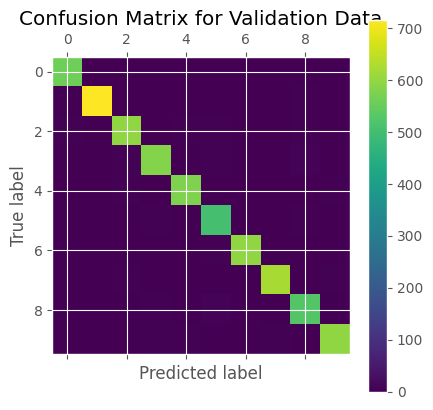

In [ ]:
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

print('\nCalculating Accuracy of Trained Classifier on Test Data... ')
acc = accuracy_score(test_labels,test_labels_pred)

print('\n Creating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels,test_labels_pred)

print('\nPredicted Labels for Test Images: ',test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ',acc)
print('\nConfusion Matrix for Test Data: \n',conf_mat_test)


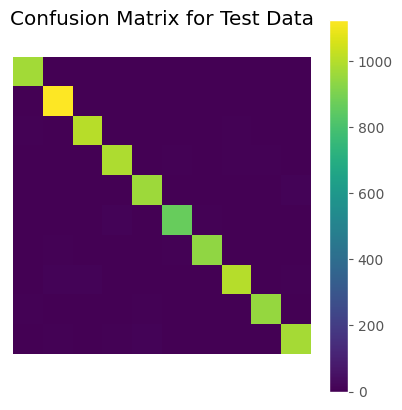

In [ ]:
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

sys.stdout = old_stdout
log_file.close()

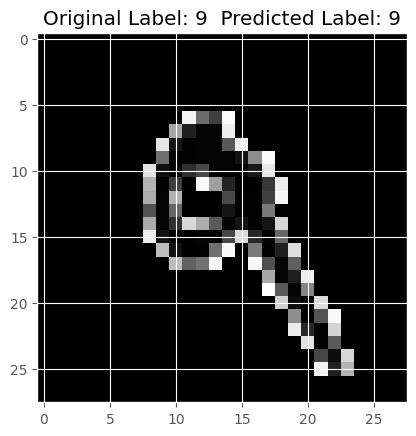

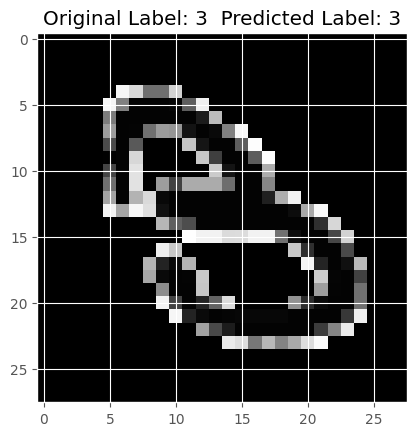

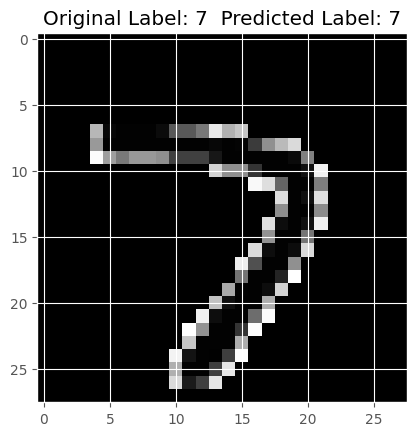

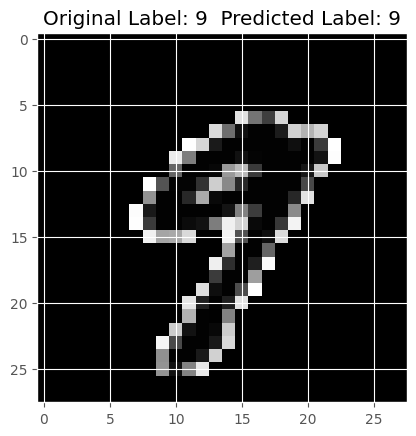

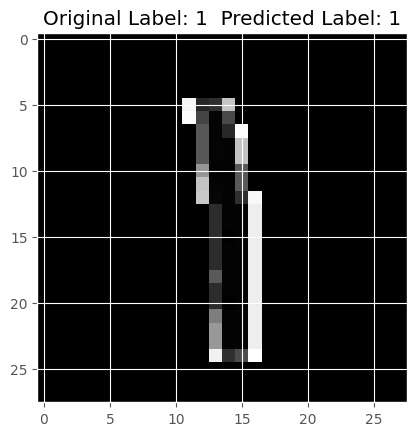

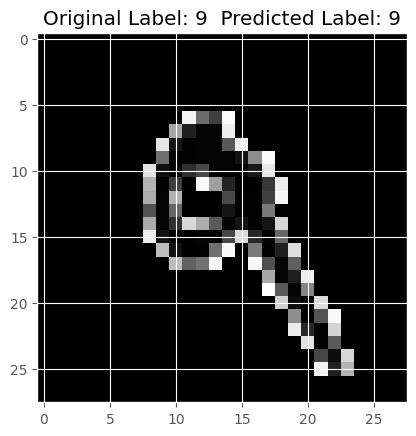

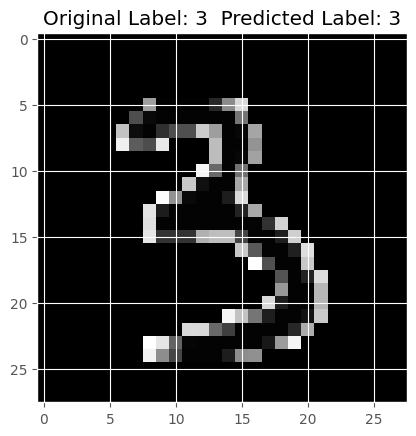

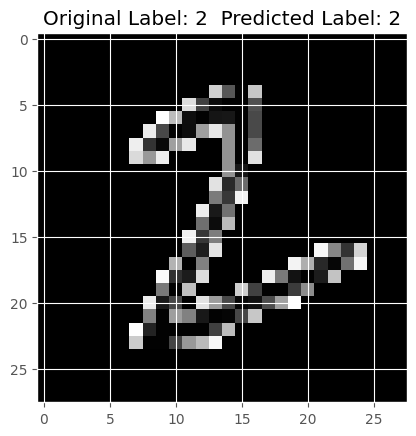

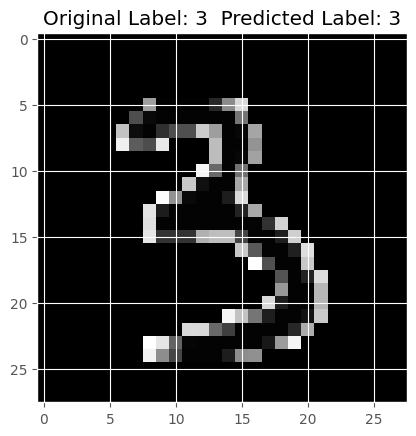

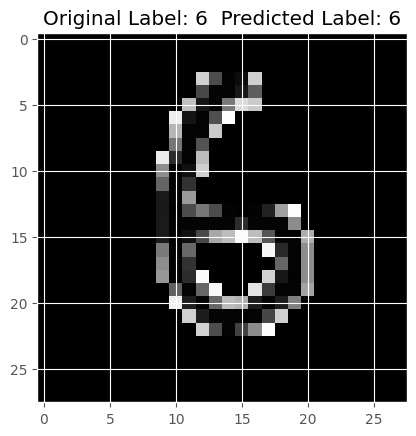

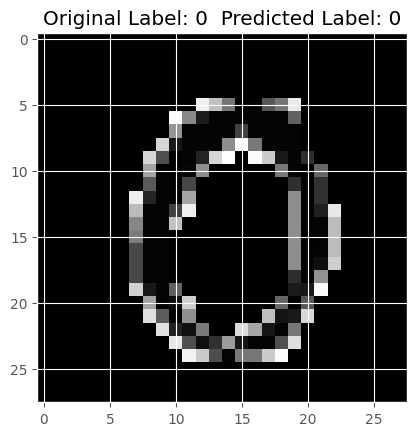

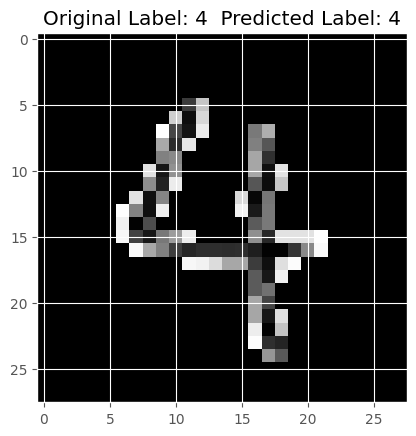

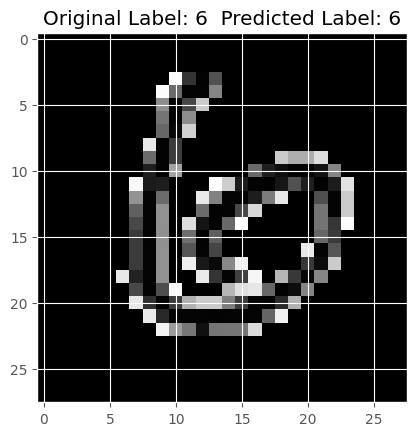

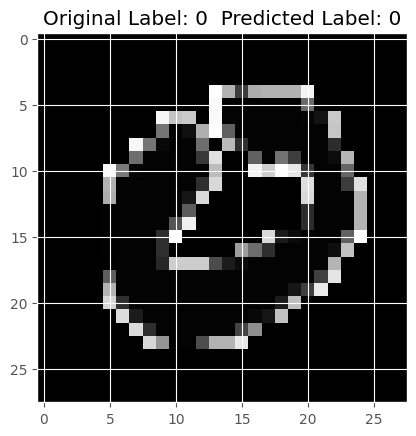

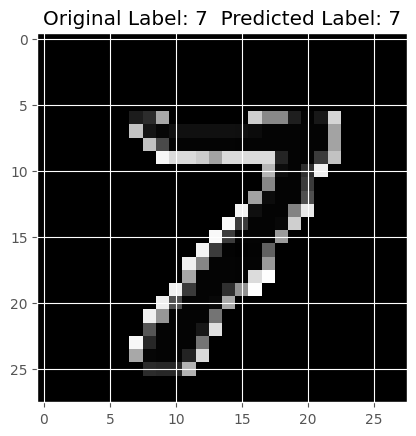

In [ ]:
sys.stdout = old_stdout
log_file.close()


# Show the Test Images with Original and Predicted Labels
a = np.random.randint(1,40,15)
for i in a:
	two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
	plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
	plt.imshow(two_d, interpolation='nearest',cmap='gray')
	plt.show()

In [ ]:
##random forest##

In [ ]:
import sys
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


In [ ]:

old_stdout = sys.stdout
log_file = open("summary.log","w")
sys.stdout = log_file


In [ ]:
print('\nLoading MNIST Data...')
# data = MNIST('./python-mnist/data/')

data = MNIST('/content/drive/MyDrive/Handwritten-Digit-Recognition-using-Deep-Learning-main (1)/Handwritten-Digit-Recognition-using-Deep-Learning-main/3. Random Forest Classifier/MNIST_Dataset_Loader/dataset')


In [ ]:
print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)


#Features
X = train_img

#Labels
y = train_labels

In [ ]:
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)


print('\nRandom Forest Classifier with n_estimators = 100, n_jobs = 10')
print('\nPickling the Classifier for Future Use...')
clf = RandomForestClassifier(n_estimators=100, n_jobs=10)
clf.fit(X_train,y_train)

with open('MNIST_RFC.pickle','wb') as f:
	pickle.dump(clf, f)

pickle_in = open('MNIST_RFC.pickle','rb')
clf = pickle.load(pickle_in)

print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(X_test,y_test)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test,y_pred)

print('\nRFC Trained Classifier Confidence: ',confidence)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ',accuracy)
print('\nConfusion Matrix: \n',conf_mat)


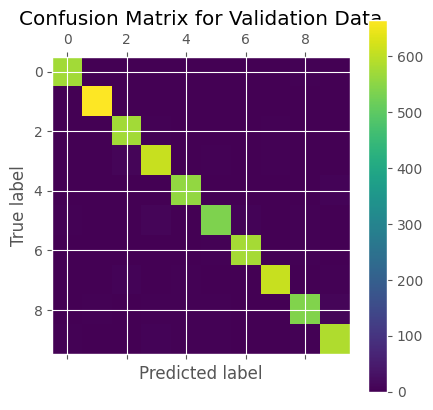

In [ ]:
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

print('\nCalculating Accuracy of Trained Classifier on Test Data... ')
acc = accuracy_score(test_labels,test_labels_pred)

print('\n Creating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels,test_labels_pred)

print('\nPredicted Labels for Test Images: ',test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ',acc)
print('\nConfusion Matrix for Test Data: \n',conf_mat_test)


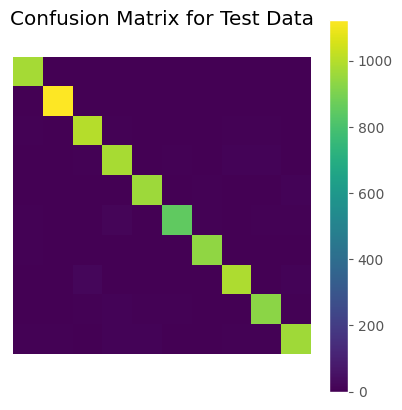

In [ ]:
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

sys.stdout = old_stdout
log_file.close()

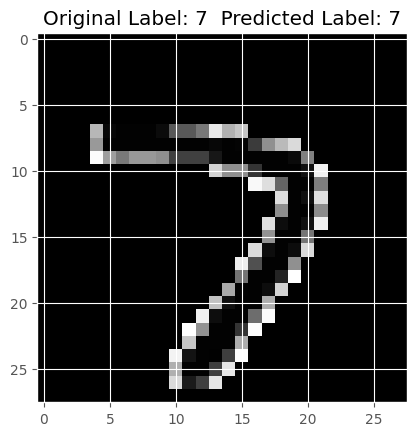

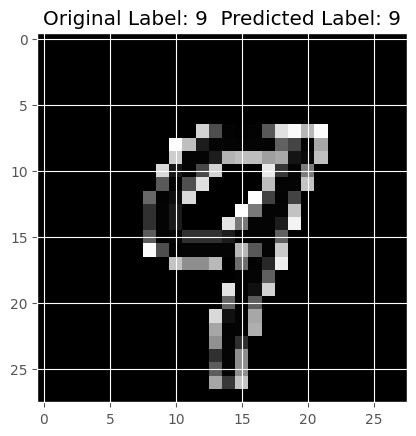

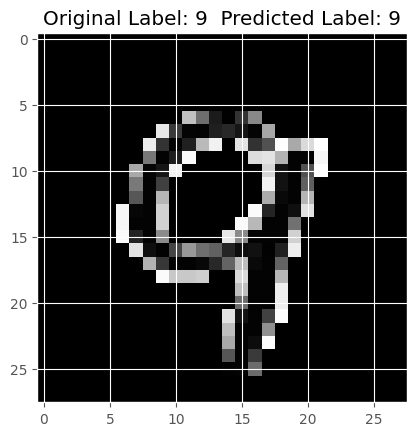

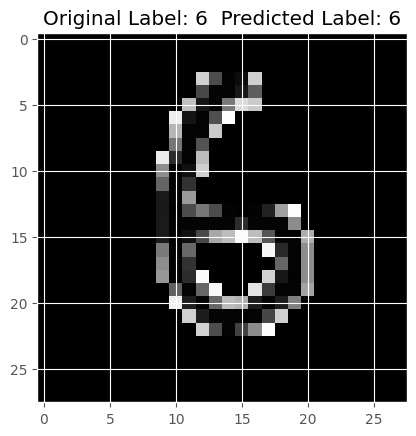

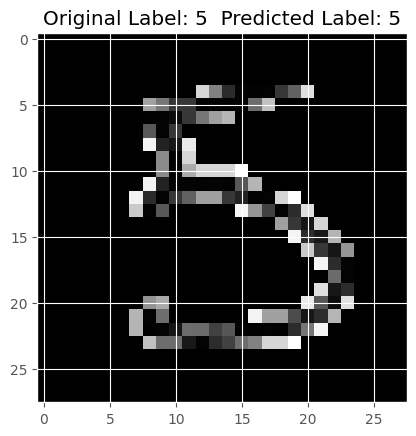

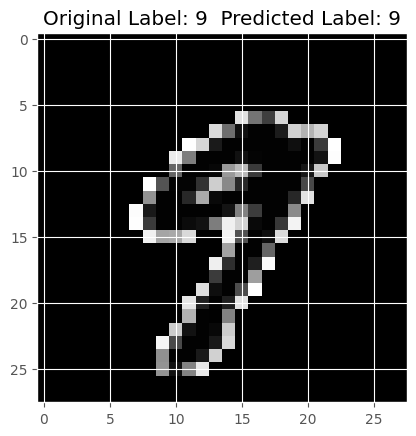

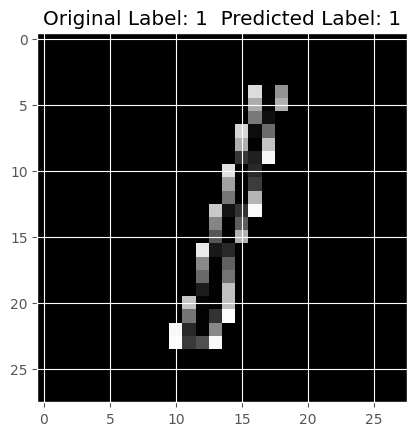

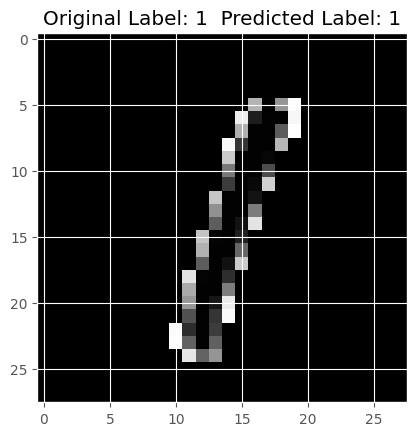

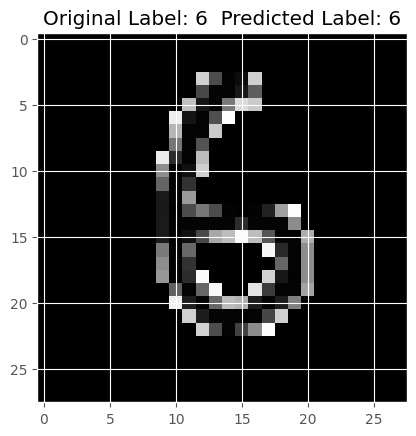

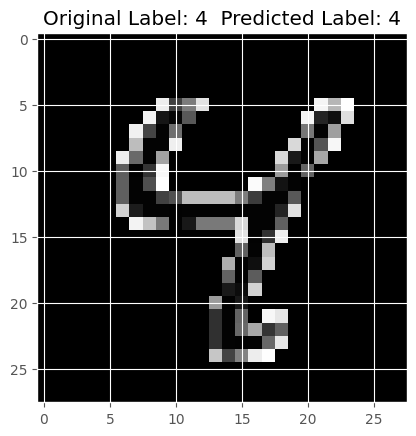

In [ ]:
a = np.random.randint(1,30,10)
for i in a:
	two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
	plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
	plt.imshow(two_d, interpolation='nearest',cmap='gray')
	plt.show()
#------------------------- EOC -----------------------------


In [57]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [2]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 48s 108ms/step - accuracy: 0.8612 - loss: 0.4926 - val_accuracy: 0.9848 - val_loss: 0.0548
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 104ms/step - accuracy: 0.9802 - loss: 0.0640 - val_accuracy: 0.9858 - val_loss: 0.0504
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 84s 109ms/step - accuracy: 0.9882 - loss: 0.0404 - val_accuracy: 0.9900 - val_loss: 0.0333
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 84s 114ms/step - accuracy: 0.9916 - loss: 0.0274 - val_accuracy: 0.9902 - val_loss: 0.0331
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 78s 105ms/step - accuracy: 0.9933 - loss: 0.0215 - val_accuracy: 0.9898 - val_loss: 0.0325
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 109ms/step - accuracy: 0.9946 - loss: 0.0172 - val_accuracy: 0.9913 - val_loss: 0.0319
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 47s 111ms/step - accuracy: 0.9955 - loss: 0.0139 - val_accuracy: 0.9912 - val_loss: 0.0346
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 111ms/step - accuracy: 0.9964 - loss: 0